In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
tc= create_taiga_client_v3()

In [3]:
crispr_dependencies = pd.read_pickle("pydata/tfs_dependencies.pkl")

In [4]:
crispr_dependencies.fillna(0, inplace=True)

In [5]:
crispr_dependencies

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,THAP6,THAP7,THAP8,THAP9,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT
ACH-000001,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,-0.087478,-0.317241,-0.052855,-0.065466,-0.645930,0.140806,-0.892911,0.215270,-0.014496,0.169385
ACH-000004,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.462663,-0.194145,0.130992,-0.251477,-0.205806,-0.090015,0.168027,0.280951,-0.182743,0.082328
ACH-000005,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.094047,-0.180209,-0.163869,-0.026951,-0.207084,-0.134599,0.374316,-0.018200,-0.283811,0.058674
ACH-000007,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,-0.071877,-0.105574,0.144103,-0.023396,0.140064,-0.069550,0.180594,0.104287,-0.311871,-0.006005
ACH-000009,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,-0.059427,-0.024232,-0.025614,-0.115766,-0.111904,0.027901,0.098494,0.060150,0.014514,0.136429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,0.040754,-0.215718,0.054442,-0.043687,-0.052162,-0.106350,0.018423,0.079413,0.005381,0.105370
ACH-003580,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.040535,-0.178553,0.195923,0.063442,-0.119621,-0.077457,-0.205756,-0.021425,0.016575,0.077086
ACH-003587,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,0.022615,0.289244,0.065706,0.043732,-0.095881,0.210714,-0.104913,-0.141233,0.058059,0.013758
ACH-003590,0.029615,-0.090314,-0.087541,-0.343993,0.073768,-0.087375,-0.049801,-0.047360,0.009253,-0.328680,...,0.038728,-0.037614,0.067970,0.051580,-0.043185,-0.007903,-0.250206,-0.080775,0.102683,0.069626


In [6]:
Model = tc.get(name='internal-24q4-8c04', version=101, file='Model')



In [7]:
# merge crispr_dependencies with cell line information based on ModelID (index in crispr_dependencies)
crispr_dependencies_merge = crispr_dependencies.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"]], left_index = True, right_on = 'ModelID')

In [8]:
crispr_dependencies_merge

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,BMAL2,ZNF875,CBLL2,ZUP1,TBXT,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,PrimaryOrMetastasis
0,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,0.140806,-0.892911,0.215270,-0.014496,0.169385,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,Metastatic
3,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.090015,0.168027,0.280951,-0.182743,0.082328,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,Primary
4,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.134599,0.374316,-0.018200,-0.283811,0.058674,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,None
6,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,-0.069550,0.180594,0.104287,-0.311871,-0.006005,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,Primary
8,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,0.027901,0.098494,0.060150,0.014514,0.136429,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,-0.106350,0.018423,0.079413,0.005381,0.105370,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,Primary
2516,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.077457,-0.205756,-0.021425,0.016575,0.077086,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,None
2518,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,0.210714,-0.104913,-0.141233,0.058059,0.013758,ACH-003587,531MII,Bone,Osteosarcoma,Metastatic
2520,0.029615,-0.090314,-0.087541,-0.343993,0.073768,-0.087375,-0.049801,-0.047360,0.009253,-0.328680,...,-0.007903,-0.250206,-0.080775,0.102683,0.069626,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,Recurrent


In [9]:
pca = sm.PCA(crispr_dependencies, ncomp =2)

In [10]:
pca_df = pca.factors

In [11]:
pca_df

,comp_0,comp_1
ACH-000001,0.056362,0.019034
ACH-000004,0.004827,-0.003771
ACH-000005,0.052118,0.005193
ACH-000007,-0.022029,0.000683
ACH-000009,0.004410,0.005290
...,...,...
ACH-003578,-0.002508,-0.000580
ACH-003580,-0.033690,0.113906
ACH-003587,-0.046981,0.114596
ACH-003590,-0.045093,0.107426


In [12]:
pca_df = pca_df.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"]], left_index = True, right_on = 'ModelID')

In [13]:
pca_df

,comp_0,comp_1,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,PrimaryOrMetastasis
0,0.056362,0.019034,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,Metastatic
3,0.004827,-0.003771,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,Primary
4,0.052118,0.005193,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,None
6,-0.022029,0.000683,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,Primary
8,0.004410,0.005290,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,Primary
...,...,...,...,...,...,...,...
2514,-0.002508,-0.000580,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,Primary
2516,-0.033690,0.113906,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,None
2518,-0.046981,0.114596,ACH-003587,531MII,Bone,Osteosarcoma,Metastatic
2520,-0.045093,0.107426,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,Recurrent


In [14]:
metastatic_pca_df = pca_df.loc[(pca_df["PrimaryOrMetastasis"] == "Metastatic") 
                               & (pca_df["OncotreeLineage"] == "Ovary/Fallopian Tube"), :]
nonmetastatic_pca_df = pca_df.loc[(pca_df["PrimaryOrMetastasis"] == "Primary")
                                  & (pca_df["OncotreeLineage"] == "Ovary/Fallopian Tube"), :]

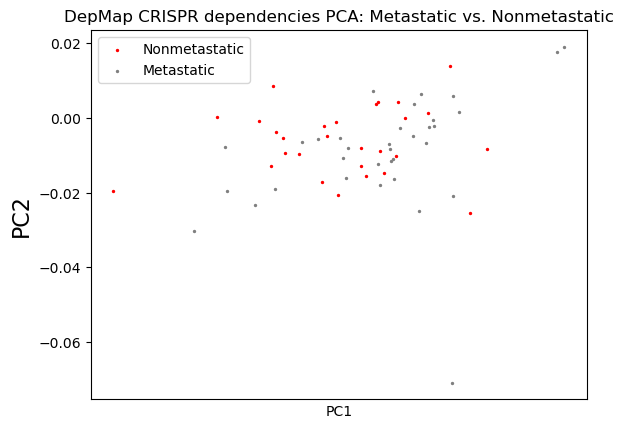

In [15]:
plt.scatter(nonmetastatic_pca_df["comp_0"], nonmetastatic_pca_df["comp_1"], color = "red", label = "Nonmetastatic", s = 2)
plt.scatter(metastatic_pca_df["comp_0"], metastatic_pca_df["comp_1"], color = "gray", label = "Metastatic", s = 2)
plt.title("DepMap CRISPR dependencies PCA: Metastatic vs. Nonmetastatic")
plt.xlabel("PC1")
plt.ylabel("PC2", fontsize = 16)
#plt.xticks([0.001, 0.002, 0.003], ["cat", "dog" ,"moose"], rotation = 45.0)
plt.xticks([])
plt.legend()

In [16]:
metastatic = Model.loc[Model.loc[:, 'PrimaryOrMetastasis'] == "Metastatic", :]
nonmetastatic = Model.loc[Model.loc[:, 'PrimaryOrMetastasis'] == "Primary", :]

In [17]:
metastatic['OncotreeLineage'].value_counts()

OncotreeLineage
Lung                         131
Esophagus/Stomach             93
Skin                          92
Breast                        53
Ovary/Fallopian Tube          48
Pancreas                      40
Bowel                         32
Peripheral Nervous System     31
Soft Tissue                   31
Lymphoid                      29
Bone                          21
Prostate                      19
Thyroid                       15
Head and Neck                 13
Kidney                        12
Biliary Tract                  9
Cervix                         8
Bladder/Urinary Tract          7
Myeloid                        7
Uterus                         7
CNS/Brain                      5
Pleura                         5
Eye                            5
Fibroblast                     4
Testis                         4
Liver                          2
Vulva/Vagina                   2
Ampulla of Vater               2
Other                          1
Name: count, dtype: int64

In [24]:
(nonmetastatic['OncotreeLineage'] == "Prostate").value_counts()

OncotreeLineage
False    1351
True        8
Name: count, dtype: int64

In [19]:
from scipy.stats import mannwhitneyu

In [20]:
def mann_whitney_test(df, tissue, tf):
    metastatic = df.loc[(df.loc[:, 'PrimaryOrMetastasis'] == "Metastatic") &
                        (df.loc[:, 'OncotreeLineage'] == tissue), tf]
    primary = df.loc[(df.loc[:, 'PrimaryOrMetastasis'] == "Primary") &
                        (df.loc[:, 'OncotreeLineage'] == tissue), tf]
    statistic, p_value = mannwhitneyu(metastatic, primary, alternative='two-sided')
    return p_value

In [21]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
alpha = 0.05  # Desired significance level (e.g., 0.05)

In [22]:
all_signifcant_tfs = []

In [23]:
for lineage in Model.OncotreeLineage.unique():
    tf_list = []
    subset_tf_pvalues = []
    for tf in crispr_dependencies.columns:
        subset_tf_pvalues.append(mann_whitney_test(crispr_dependencies_merge, lineage, tf))
        tf_list.append(tf)
    from statsmodels.stats.multitest import multipletests
    rejected, p_adjusted, _, alpha_corrected = multipletests(subset_tf_pvalues, alpha=alpha, 
                               method='fdr_bh', is_sorted=False, returnsorted=False)
    results = pd.DataFrame({
        'gene': tf_list,
        'p-value': p_adjusted,
        'lineage': lineage
    })
    sig_results = results.loc[results['p-value']< 0.1, :]
    print(sig_results)

Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []


/var/folders/fj/ncxgtgw507vg6xdnk39ry6nr0000gn/T/ipykernel_7640/932914894.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = mannwhitneyu(metastatic, primary, alternative='two-sided')


Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
       gene   p-value        lineage
743  ZNF676  0.025823  Head and Neck
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []


/var/folders/fj/ncxgtgw507vg6xdnk39ry6nr0000gn/T/ipykernel_7640/932914894.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, p_value = mannwhitneyu(metastatic, primary, alternative='two-sided')


Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []
Empty DataFrame
Columns: [gene, p-value, lineage]
Index: []


In [135]:
all_tf_pvalues

[array([0.96877988, 0.96877988, 0.82615362, ..., 0.95849658, 0.83335058,
        0.84331271]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1.        , 0.93535469, 0.98228308, ..., 0.9988403 , 0.98228308,
        0.84436038]),
 array([0.81807657, 0.81807657, 0.96239801, ..., 0.84927739, 0.81807657,
        0.78352848]),
 array([0.99661182, 0.94807195, 0.9875518 , ..., 0.96639913, 0.98857929,
        1.        ]),
 array([1.        , 0.96594314, 1.        , ..., 0.97948295, 1.        ,
        1.        ]),
 array([0.98991552, 0.99929636, 0.99211274, ..., 0.99812529, 0.98460853,
        0.98460853]),
 array([0.939387  , 0.939387  , 0.96846535, ..., 0.99386672, 0.93261605,
        0.95279161]),
 array([0.9892982 , 0.96285825, 0.98228703, ..., 0.9892982 , 0.96285825,
        0.96285825]),
 array([1.        , 0.97519003, 0.94381647, ..., 1.        , 0.9983989 ,
        0.99611729]),
 array([0.75301089, 0.99515245, 0.92080136, ..., 0.56466522, 0.99663567,
        0.75301089]),
 array([0.9

In [ ]:
transcription_factors_below_threshold = {}

# Iterate over each lineage (36 in total)
for lineage_idx, pvals in enumerate(all_tf_pvalues):
    # Get transcription factors with p-value < 0.1
    filtered_factors = [
        crispr_dependencies.columns[i]  # Get TF name
        for i, pval in enumerate(pvals)
        if pval < 0.1
    ]
    
    # Store the result for the current lineage
    transcription_factors_below_threshold[f'Lineage_{lineage_idx + 1}'] = filtered_factors

# Display the results
for lineage, factors in transcription_factors_below_threshold.items():
    print(f'{lineage}: {factors}')

In [121]:
from statsmodels.stats.multitest import multipletests
rejected, p_adjusted, _, alpha_corrected = multipletests(tf_pvalues, alpha=alpha, 
                               method='fdr_bh', is_sorted=False, returnsorted=False)

In [122]:
sorted(p_adjusted)

[np.float64(0.3772308650682776),
 np.float64(0.3772308650682776),
 np.float64(0.3772308650682776),
 np.float64(0.3772308650682776),
 np.float64(0.45370857380754337),
 np.float64(0.5263186147563448),
 np.float64(0.658907380093507),
 np.float64(0.658907380093507),
 np.float64(0.658907380093507),
 np.float64(0.658907380093507),
 np.float64(0.6600256802750516),
 np.float64(0.6811798967793764),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0.7015158117687692),
 np.float64(0

In [74]:
crispr_dependencies.columns

Index(['TFAP2A', 'TFAP2B', 'TFAP2C', 'TFAP2D', 'TFAP2E', 'ARID3A', 'ARID3B',
       'ARID3C', 'ARID5A', 'ARID5B',
       ...
       'THAP6', 'THAP7', 'THAP8', 'THAP9', 'BMAL1', 'BMAL2', 'ZNF875', 'CBLL2',
       'ZUP1', 'TBXT'],
      dtype='object', length=1543)